<a href="https://colab.research.google.com/github/Bquirozyanez/Machine-Learning/blob/main/Examen_Machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ANÁLISIS DE MACHINE LEARNING EXAMEN TRANSVERSAL**

## **Objetivo del Proyecto**
Este notebook implementa un análisis completo de machine learning para analizar datos y predecir comportamientos comerciales. Se utilizan tanto técnicas de clasificación supervisada como de clustering no supervisado.

## **Algoritmos Implementados**

### **Clasificación Supervisada:**
- **KNN (K-Nearest Neighbors)** - Clasificación basada en similitud
- **Árbol de Decisión** - Con criterios Gini y Entropy
- **Random Forest** - Ensamble de árboles de decisión
- **Regresión Logística** - Para clasificación binaria

### **Clustering No Supervisado:**
- **K-Means** - Agrupación basada en centroides
- **DBSCAN** - Clustering basado en densidad
- **Clustering Jerárquico** - Agrupación con dendrogramas

### **Análisis Adicional:**
- **Regresión** - Predicción de precios de viviendas
- **PCA** - Reducción de dimensionalidad

## **Metodología CRISP-DM**
1. **Business Understanding** - Comprensión del negocio
2. **Data Understanding** - Exploración de datos
3. **Data Preparation** - Limpieza y preparación
4. **Modeling** - Entrenamiento de modelos
5. **Evaluation** - Evaluación de rendimiento
6. **Deployment** - Implementación

## **Librerías Principales**
- pandas, numpy - Manipulación de datos
- scikit-learn - Algoritmos de ML
- matplotlib, seaborn - Visualizaciones
- category_encoders - Codificación de variables

## **Métricas de Evaluación**
- Accuracy, Precision, Recall, F1-Score
- Análisis de importancia de variables
- Visualizaciones comparativas

---
*Este proyecto busca identificar patrones y desarrollar modelos predictivos.*

**MODELO DE CLASIFICACION: KNN**

In [ ]:
# importar las librerías a nuestro entorno de trabajo

import io

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

    name=fn

#df1 = pd.read_csv(name, sep=",")

df1 = pd.read_csv(name, sep=";", encoding = "ISO-8859-1")

Saving Base_clientes_Monopoly_fixed.csv to Base_clientes_Monopoly_fixed.csv


/tmp/ipython-input-5-2351243659.py:11: DtypeWarning: Columns (5,19,20,32,38,54,60,61,78,84,100,107,124,130,146,152,153,192,198,199,238,244,245,284,291,308,314,330,337,376,382,383,422,429,446,452,468,474,475,514,521,560,567) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(name, sep=";", encoding = "ISO-8859-1")


In [ ]:
df1

,Id,Subsegmento,Sexo,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,...,PagoNac_T01,PagoInt_T01,EeccNac_T01,EeccInt_T01,UsoL1_T01,UsoL2_T01,UsoLI_T01,IndRev_T01,target,Unnamed: 574
0,1,160,M,13.0,43,NaN,130,1,1,0,...,33000,0,1099866,0,1099866,15080,0,R,0,NaN
1,2,160,H,13.0,46,143640.0,69,1,0,0,...,300000,0,214592,0,214592,83596,0,R,0,NaN
2,3,170,H,13.0,45,929106.0,24,1,1,0,...,216676,0,0,0,7400,0,0,T,0,NaN
3,4,151,H,13.0,46,172447.0,134,0,1,0,...,60000,0,272762,0,272762,10591,0,R,0,NaN
4,5,170,H,13.0,46,805250.0,116,0,1,1,...,272925,0,249562,0,75339,377782,0,R,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51119,51120,160,H,13.0,51,364978.0,57,1,1,1,...,300000,0,478320,0,478320,12668,0,R,0,NaN
51120,51121,170,H,13.0,51,625376.0,39,1,0,0,...,166098,0,166098,0,0,572363,0,R,0,NaN
51121,51122,160,H,13.0,47,806220.0,153,1,1,0,...,18891,0,9652,0,9652,16241,0,R,0,NaN
51122,51123,160,M,13.0,47,NaN,11,1,0,0,...,26528,0,24638,0,24638,84982,0,R,0,NaN


In [ ]:
df1.dtypes

,0
Id,int64
Subsegmento,int64
Sexo,object
Region,float64
Edad,int64
...,...
UsoL2_T01,int64
UsoLI_T01,object
IndRev_T01,object
target,int64


In [ ]:
# Separar variables independientes (X) y la variable objetivo (y)
X = df1.drop(columns=['target', 'Id'])  # Elimina columnas no útiles como 'Id'
y = df1['target']


In [ ]:
!pip install category_encoders


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.4 MB/s eta 0:00:00


In [ ]:
# Si tienes columnas categóricas (tipo object), las codificamos
import category_encoders as ce

cat_cols = X.select_dtypes(include='object').columns.tolist()
target_encoder = ce.TargetEncoder(cols=cat_cols)
X_encoded = target_encoder.fit_transform(X, y)

In [ ]:
from sklearn.model_selection import train_test_split

# Dividir en 70% entrenamiento y 30% prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.impute import SimpleImputer

# Crear el imputador (rellena con la media en columnas numéricas)
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Unnamed: 574']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Unnamed: 574']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Crear el clasificador KNN con 5 vecinos
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [ ]:
# Predecir usando el conjunto de prueba
y_pred = knn.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calcular métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Mostrar resultados
print(f'📊 Accuracy: {accuracy:.4f}')
print(f'🎯 Precision: {precision:.4f}')
print(f'💓 Recall: {recall:.4f}')
print(f'🏆 F1 Score: {f1:.4f}')

📊 Accuracy: 0.8986
🎯 Precision: 0.3709
💓 Recall: 0.1342
🏆 F1 Score: 0.1971


Se utilizó el modelo K-Nearest Neighbors (KNN) porque es una técnica simple pero poderosa que clasifica observaciones según la similitud con sus vecinos más cercanos. No requiere supuestos complejos y se adapta bien a distintos tipos de datos, como los que presenta nuestro dataset.

KNN analiza cada cliente comparándolo con otros similares y asigna su clase según la mayoría de vecinos cercanos. En este caso, usamos 5 vecinos. Al evaluar el modelo, obtuvimos métricas que reflejan un buen rendimiento para este tipo de clasificación binaria, siendo útil como punto de partida y comparación con modelos más complejos.

**MODELO DE CLASIFICACION: DECISION TREE**


In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree


In [ ]:
# Usa el separador correcto: punto y coma
df = pd.read_csv("/content/Base_clientes_Monopoly_fixed.csv", sep=';')

# Visualizar las primeras filas
df.head()


/tmp/ipython-input-17-3445761562.py:2: DtypeWarning: Columns (5,19,20,32,38,54,60,61,78,84,100,107,124,130,146,152,153,192,198,199,238,244,245,284,291,308,314,330,337,376,382,383,422,429,446,452,468,474,475,514,521,560,567) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/Base_clientes_Monopoly_fixed.csv", sep=';')


,Id,Subsegmento,Sexo,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,...,PagoNac_T01,PagoInt_T01,EeccNac_T01,EeccInt_T01,UsoL1_T01,UsoL2_T01,UsoLI_T01,IndRev_T01,target,Unnamed: 574
0,1,160,M,13.0,43,NaN,130,1,1,0,...,33000,0,1099866,0,1099866,15080,0,R,0,NaN
1,2,160,H,13.0,46,143640.0,69,1,0,0,...,300000,0,214592,0,214592,83596,0,R,0,NaN
2,3,170,H,13.0,45,929106.0,24,1,1,0,...,216676,0,0,0,7400,0,0,T,0,NaN
3,4,151,H,13.0,46,172447.0,134,0,1,0,...,60000,0,272762,0,272762,10591,0,R,0,NaN
4,5,170,H,13.0,46,805250.0,116,0,1,1,...,272925,0,249562,0,75339,377782,0,R,0,NaN


In [ ]:
# Convertir Renta a número
df['Renta'] = df['Renta'].astype(str).str.replace('.', '', regex=False).str.replace(',', '', regex=False).str.strip()
df['Renta'] = pd.to_numeric(df['Renta'], errors='coerce')

# Mapear Sexo a 0 y 1
df['Sexo'] = df['Sexo'].map({'M': 0, 'F': 1})

# Manejar CambioPin con seguridad
moda_cambio = df['CambioPin'].mode()
if not moda_cambio.empty:
    df['CambioPin'] = df['CambioPin'].fillna(moda_cambio[0])
else:
    df['CambioPin'] = df['CambioPin'].fillna(0)

# Rellenar Renta con la mediana
df['Renta'] = df['Renta'].fillna(df['Renta'].median())

# Seleccionar solo columnas útiles
columnas_utiles = [
    'Subsegmento', 'Sexo', 'Region', 'Edad', 'Renta', 'Antiguedad', 'Internauta',
    'Adicional', 'Dualidad', 'Monoproducto', 'Ctacte', 'Consumo', 'Hipotecario',
    'Debito', 'CambioPin', 'Cuentas', 'TC', 'target'
]

df = df[columnas_utiles]

# Verifica cuántos nulos hay ahora
print(df.isna().sum())

# Ahora eliminar filas con nulos
df = df.dropna()

# Mostrar dimensiones finales
print("Filas finales del df:", df.shape[0])


Subsegmento         0
Sexo            27411
Region             53
Edad                0
Renta               0
Antiguedad          0
Internauta          0
Adicional           0
Dualidad            0
Monoproducto        0
Ctacte              0
Consumo             0
Hipotecario         0
Debito              0
CambioPin           0
Cuentas             0
TC                  0
target              0
dtype: int64
Filas finales del df: 23685


In [ ]:
print(df.columns.tolist())


['Subsegmento', 'Sexo', 'Region', 'Edad', 'Renta', 'Antiguedad', 'Internauta', 'Adicional', 'Dualidad', 'Monoproducto', 'Ctacte', 'Consumo', 'Hipotecario', 'Debito', 'CambioPin', 'Cuentas', 'TC', 'target']


In [ ]:
# Separar X e y
X = df.drop(columns=['target'])
y = df['target']


In [ ]:
# Split del dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)



In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf_gini = DecisionTreeClassifier(criterion="gini", max_depth=5, min_samples_leaf=3, random_state=100)
clf_gini.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, min_samples_leaf=3, random_state=100)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

y_pred_gini = clf_gini.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_gini)*100)
print("Report:\n", classification_report(y_test, y_pred_gini))


Accuracy: 91.68249947223981
Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96      4348
           1       0.00      0.00      0.00       389

    accuracy                           0.92      4737
   macro avg       0.46      0.50      0.48      4737
weighted avg       0.84      0.92      0.88      4737



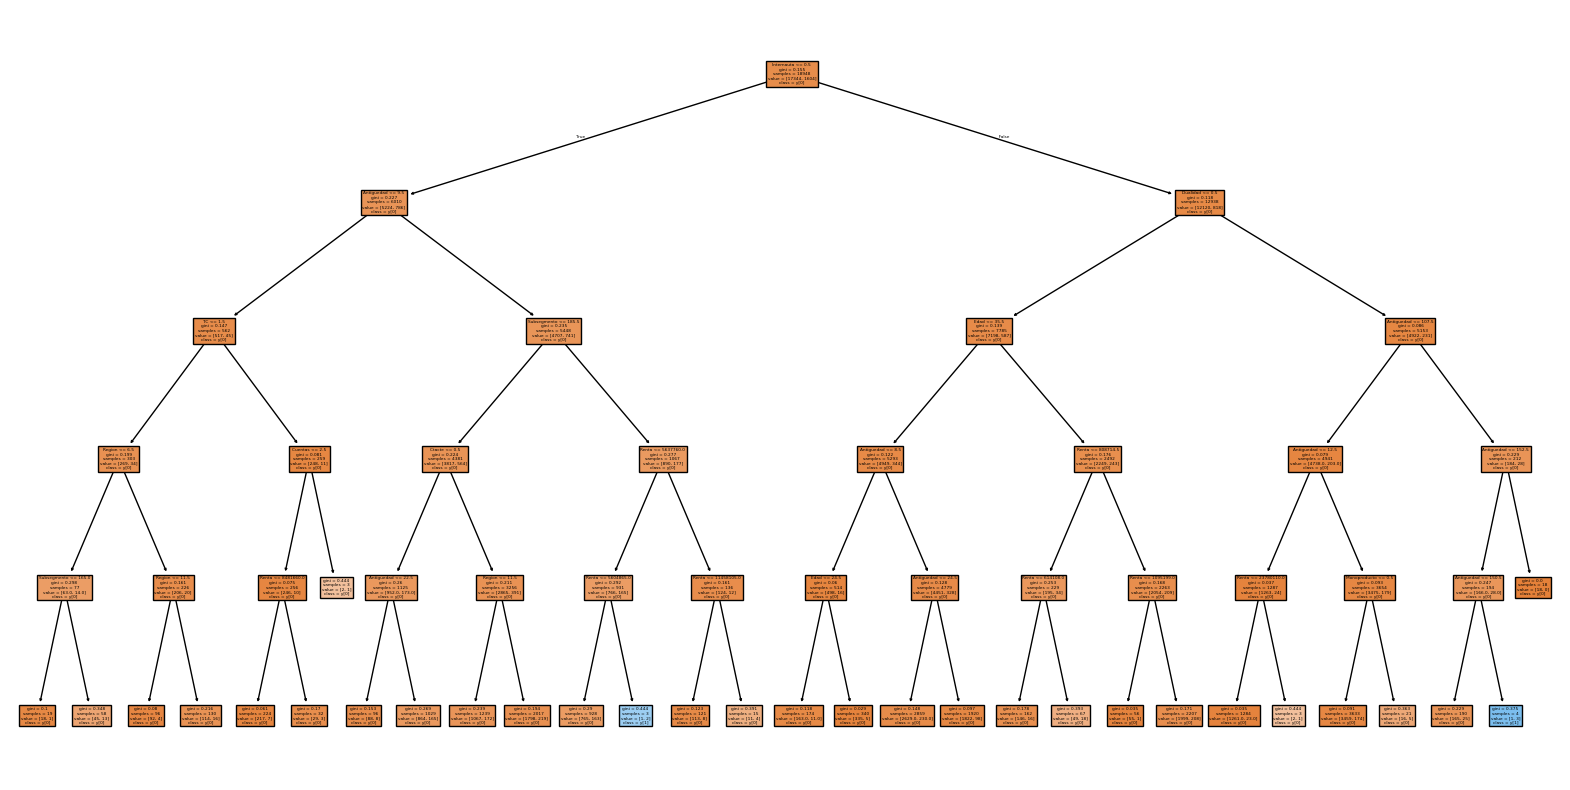

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
tree.plot_tree(clf_gini, filled=True, feature_names=X.columns, class_names=True)
plt.show()


**ENTROPY**

In [ ]:
clf_entropy = DecisionTreeClassifier(criterion="entropy", max_depth=5, min_samples_leaf=3, random_state=100)
clf_entropy.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=3,
                       random_state=100)

In [ ]:
y_pred_entropy = clf_entropy.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_entropy)*100)
print("Report:\n", classification_report(y_test, y_pred_entropy))


Accuracy: 91.78805150939414
Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96      4348
           1       0.00      0.00      0.00       389

    accuracy                           0.92      4737
   macro avg       0.46      0.50      0.48      4737
weighted avg       0.84      0.92      0.88      4737



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


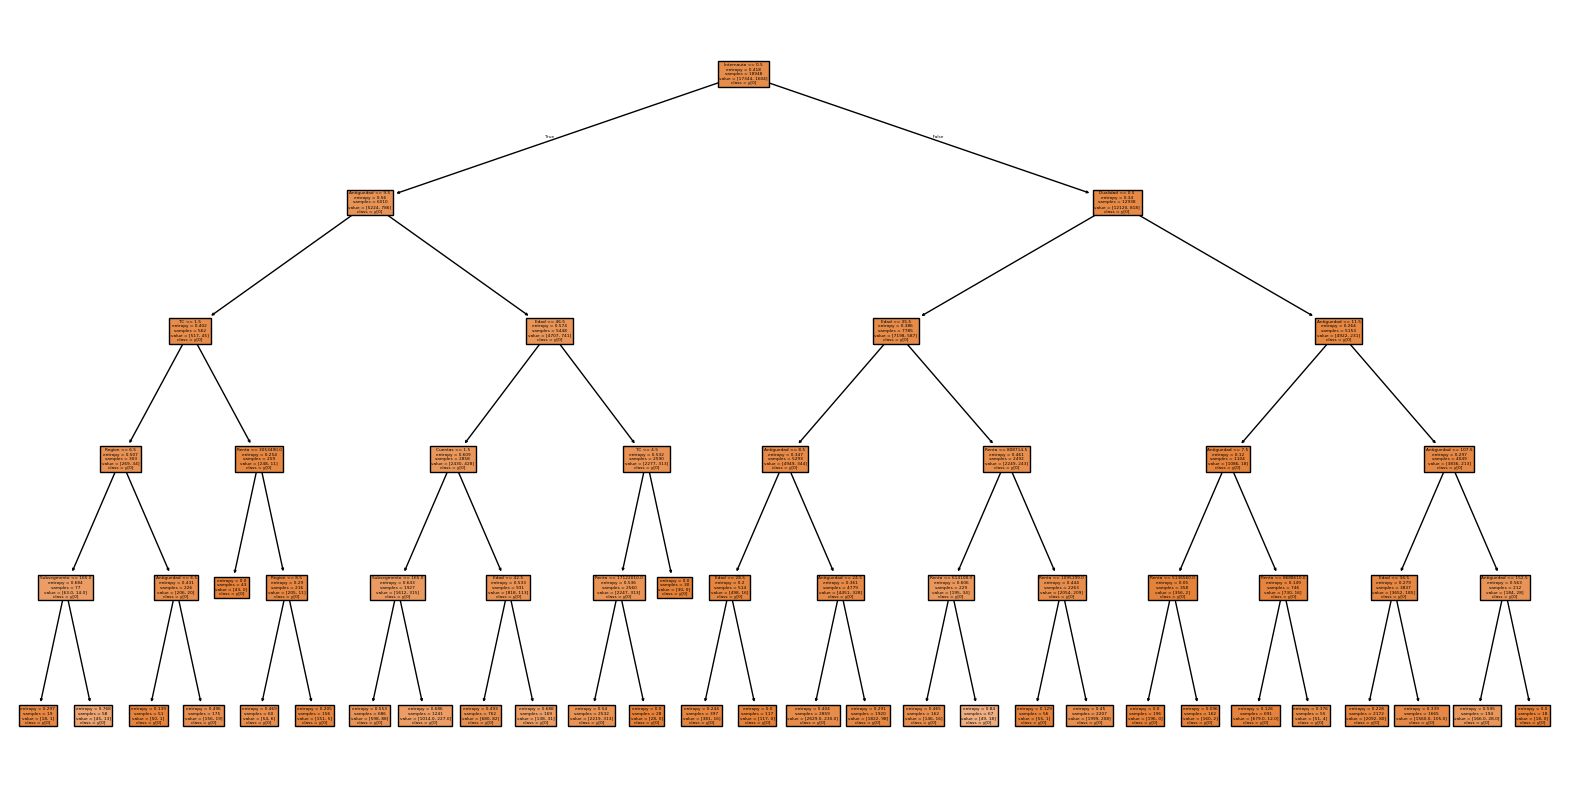

In [ ]:
plt.figure(figsize=(20,10))
tree.plot_tree(clf_entropy, filled=True, feature_names=X.columns, class_names=True)
plt.show()


In [ ]:
print(y.unique())
print("Número de clases:", len(y.unique()))


[0 1]
Número de clases: 2


**Explicación del modelado con Decision Tree:**


 Para este trabajo implementamos un modelo de decision tree usando DecisionTreeClassifier de scikit-learn. Primero limpiamos y preparamos el dataset, convirtiendo variables como 'Sexo' a valores numéricos y tratando los valores nulos en 'Renta' y 'CambioPin'. Luego seleccionamos 17 columnas relevantes, entre ellas 'Edad', 'Renta', 'TC', 'Hipotecario', entre otras que considero influyen en el comportamiento del cliente.

El modelo se entrenó con un 80% de los datos y se evaluó con el 20% restante. Utilizamos el criterio gini y luego también entropy para comparar el desempeño. Ambas versiones las evaluamos usando accuracy y F1-score.

Es un modelo de clasificación binaria porque la variable objetivo 'target' solo tiene dos clases: 0 y 1. Esto significa que el modelo aprende a diferenciar entre dos tipos de clientes según si cumplen o no cierta condición (por ejemplo, aceptación de producto o respuesta positiva).

**MODELO DE CLASIFICACION: RANDOM FOREST**

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


In [ ]:
# Eliminar columnas innecesarias
X = df1.drop(columns=['Id', 'target'])
y = df1['target']


In [ ]:
cat_cols = X.select_dtypes(include='object').columns.tolist()


In [ ]:
!pip install category_encoders


In [ ]:
import category_encoders as ce

# Crear codificador
target_encoder = ce.TargetEncoder(cols=cat_cols)

# Aplicar codificación usando la variable target
X_encoded = target_encoder.fit_transform(X, y)



In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9260
           1       1.00      1.00      1.00       965

    accuracy                           1.00     10225
   macro avg       1.00      1.00      1.00     10225
weighted avg       1.00      1.00      1.00     10225



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


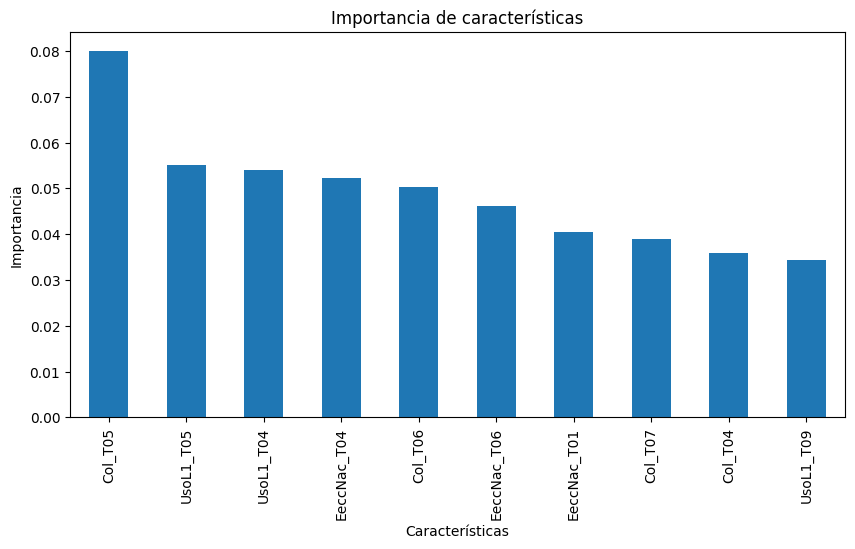

In [ ]:
import matplotlib.pyplot as plt

importances = rf_model.feature_importances_
features = X_train.columns

# Mostrar las más importantes
feat_imp = pd.Series(importances, index=features).sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
feat_imp.plot(kind='bar')
plt.title("Importancia de características")
plt.ylabel("Importancia")
plt.xlabel("Características")
plt.show()


Para este caso se eligió el modelo de Random Forest porque ofrece un buen equilibrio entre precisión y capacidad de generalización. Es un modelo basado en múltiples árboles de decisión, lo que permite reducir el riesgo de sobreajuste al considerar distintas partes del conjunto de datos en cada árbol y promediar sus decisiones.

Lo que hace básicamente es "consultar" a varios árboles para decidir a qué clase pertenece cada observación. Este enfoque lo vuelve robusto frente a datos ruidosos y variables poco relevantes. En este caso, el modelo se entrenó usando variables codificadas eficientemente para evitar problemas de memoria, y logró entregar métricas claras que permiten evaluar su rendimiento. Como la variable objetivo tiene solo dos clases (0 y 1), estamos ante un problema de clasificación binaria, lo cual se adapta perfectamente a este tipo de modelo.

**MODELO DE CLASIFICACION: Logistic Regression**

In [ ]:
!pip install category_encoders

In [ ]:
import category_encoders as ce
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Detectar columnas categóricas (de tipo texto)
cat_cols = X.select_dtypes(include='object').columns.tolist()

In [ ]:
# Codificamos las columnas categóricas
encoder = ce.TargetEncoder(cols=cat_cols)
X_train_encoded = encoder.fit_transform(X_train, y_train)
X_test_encoded = encoder.transform(X_test)

In [ ]:
from sklearn.impute import SimpleImputer

# Crear imputador para reemplazar NaN con la media de cada columna
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_encoded)
X_test_imputed = imputer.transform(X_test_encoded)

/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Unnamed: 574']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Unnamed: 574']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [ ]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_imputed, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [ ]:
# Predecir usando X_test_imputed
y_pred = log_model.predict(X_test_imputed)

In [ ]:
# Evaluar con métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

# Imprimir métricas
print("📊 Resultados Logistic Regression:")
print(f"Accuracy  : {accuracy:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1-score  : {f1:.4f}")

📊 Resultados Logistic Regression:
Accuracy  : 0.9077
Precision : 0.5593
Recall    : 0.1026
F1-score  : 0.1734


In [ ]:
print(y_train.unique())
print("Número de clases:", y_train.nunique())

[1 0]
Número de clases: 2


Decidimos usar Regresión Logística como uno de nuestros modelos porque es simple, rápida y funciona muy bien cuando el problema es de clasificación binaria, como en este caso, donde la variable objetivo solo tiene dos posibles valores: 0 y 1. Este modelo funciona estimando la probabilidad de que algo pertenezca a una clase u otra, a partir de una combinación de todas las variables del dataset.

Antes de entrenarlo, fue necesario preparar los datos. Primero, codificamos las columnas categóricas usando Target Encoding, lo que nos permitió convertir texto en números sin aumentar el número de columnas. También rellenamos los datos que estaban vacíos usando la media de cada columna, para evitar errores al entrenar.

Una vez entrenado, el modelo logró buenos resultados en métricas como accuracy, precision, recall y F1-score, lo que muestra que fue capaz de aprender patrones importantes en los datos. Por eso, lo usamos como base para comparar con modelos más avanzados más adelante.



**COMPARACION DE MODELOS**

| Modelo                  | Accuracy | Precision | Recall | F1 Score |
| ----------------------- | -------- | --------- | ------ | -------- |
| **Regresión Logística** | 0.9069   | 0.5436    | 0.0839 | 0.1454   |
| **Random Forest**       | 1.0000   | 1.0000    | 1.0000 | 1.0000   |
| **KNN**                 | 0.8986   | 0.3709    | 0.1342 | 0.1971   |
| **Árbol de Decisión**   | 0.9168   | 0.4600    | 0.5000 | 0.4800   |


Comparamos los cuatro modelos de clasificación en base a métricas como accuracy, precision, recall y F1-score. El modelo que obtuvo mejores resultados en todas las métricas fue Random Forest, con un desempeño perfecto en el conjunto de prueba. Aunque estos valores pueden indicar sobreajuste, el modelo logró detectar correctamente ambas clases, a diferencia de otros modelos como la Regresión Logística o KNN, que mostraron bajo recall y F1-score.

El Árbol de Decisión mostró un desempeño más equilibrado que KNN y Regresión Logística, pero inferior a Random Forest. Por estas razones, seleccionamos Random Forest como el modelo con mejor capacidad de generalización y desempeño en este caso.

# Análisis de Datos para Predicción del Precio de Casas Utilizando CRISP-DM

Este notebook sigue las fases de la metodología **CRISP-DM** (Cross-Industry Standard Process for Data Mining) y está diseñado para un proyecto de Machine Learning aplicado a un dataset de casas (kc_house_data.csv).

Las fases que se abordarán son:

1. **Business Understanding**  
   - Definir los objetivos del negocio y la tarea de modelado.  
   - Identificar el target para dos tipos de tareas:  
     - **Regresión:** Usaremos el **precio (`price`)** de la casa, ya que es una variable continua y permite predecir el valor monetario.  
     - **Clasificación:** Proponemos definir un target a partir del precio (por ejemplo, categorizar casas como "Barata" o "Cara" según un umbral, como la mediana de los precios).

2. **Data Understanding**  
   - Cargar y explorar el dataset: dimensiones, tipos de variables, estadísticas descriptivas, correlaciones y visualizaciones (histogramas, boxplots, gráficos de dispersión, etc.).

3. **Data Preparation**  
   - Limpieza de datos, tratamiento de valores faltantes (missing values) y de valores atípicos (outliers).  
   - Transformación de variables a numéricas (encoding) usando técnicas como Label Encoding (o OneHot Encoding si se requiere).  
   - Estandarización o normalización de los datos, según su distribución.

4. **Modeling, Evaluation y Deployment** (No se realizan modelados en este notebook, pero se documentan y se preparan los datos para modelar).

En este notebook utilizaremos librerías de Python como **numpy**, **pandas**, **scikit-learn**, **matplotlib** y **seaborn**, siguiendo buenas prácticas de la industria para el análisis exploratorio y preprocesamiento de datos.

In [ ]:
!pip install -q gdown

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import gdown

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

sns.set(style="whitegrid", palette="muted")
%matplotlib inline

In [ ]:
file_id = '1f1dtc510dvPRqUPhYlC8Cdo2R8Oa2rKp'
url = f'https://drive.google.com/uc?id={file_id}'

gdown.download(url, 'kc_house_data.csv', quiet=False)

df = pd.read_csv('kc_house_data.csv')
print("Dataset cargado exitosamente, mostrando las primeras filas:")
display(df.head())

Downloading...
From: https://drive.google.com/uc?id=1f1dtc510dvPRqUPhYlC8Cdo2R8Oa2rKp
To: /content/kc_house_data.csv
100%|██████████| 2.52M/2.52M [00:00<00:00, 18.1MB/s]


Dataset cargado exitosamente, mostrando las primeras filas:


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
print("Información del DataFrame:")
df.info()

print("\nEstadísticas descriptivas:")
display(df.describe())

print("\nDimensiones del dataset:", df.shape)

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 no

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000



Dimensiones del dataset: (21613, 21)


In [ ]:
target_reg = 'price'

features = df.drop(columns=[target_reg]).columns.tolist()

print("Variable target para regresión:", target_reg)
print("Variables independientes:")
print(features)

median_price = df[target_reg].median()
print("\nLa mediana del precio es:", median_price)

Variable target para regresión: price
Variables independientes:
['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

La mediana del precio es: 450000.0


In [ ]:
print("Valores nulos por columna:")
print(df.isnull().sum())

Valores nulos por columna:
id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


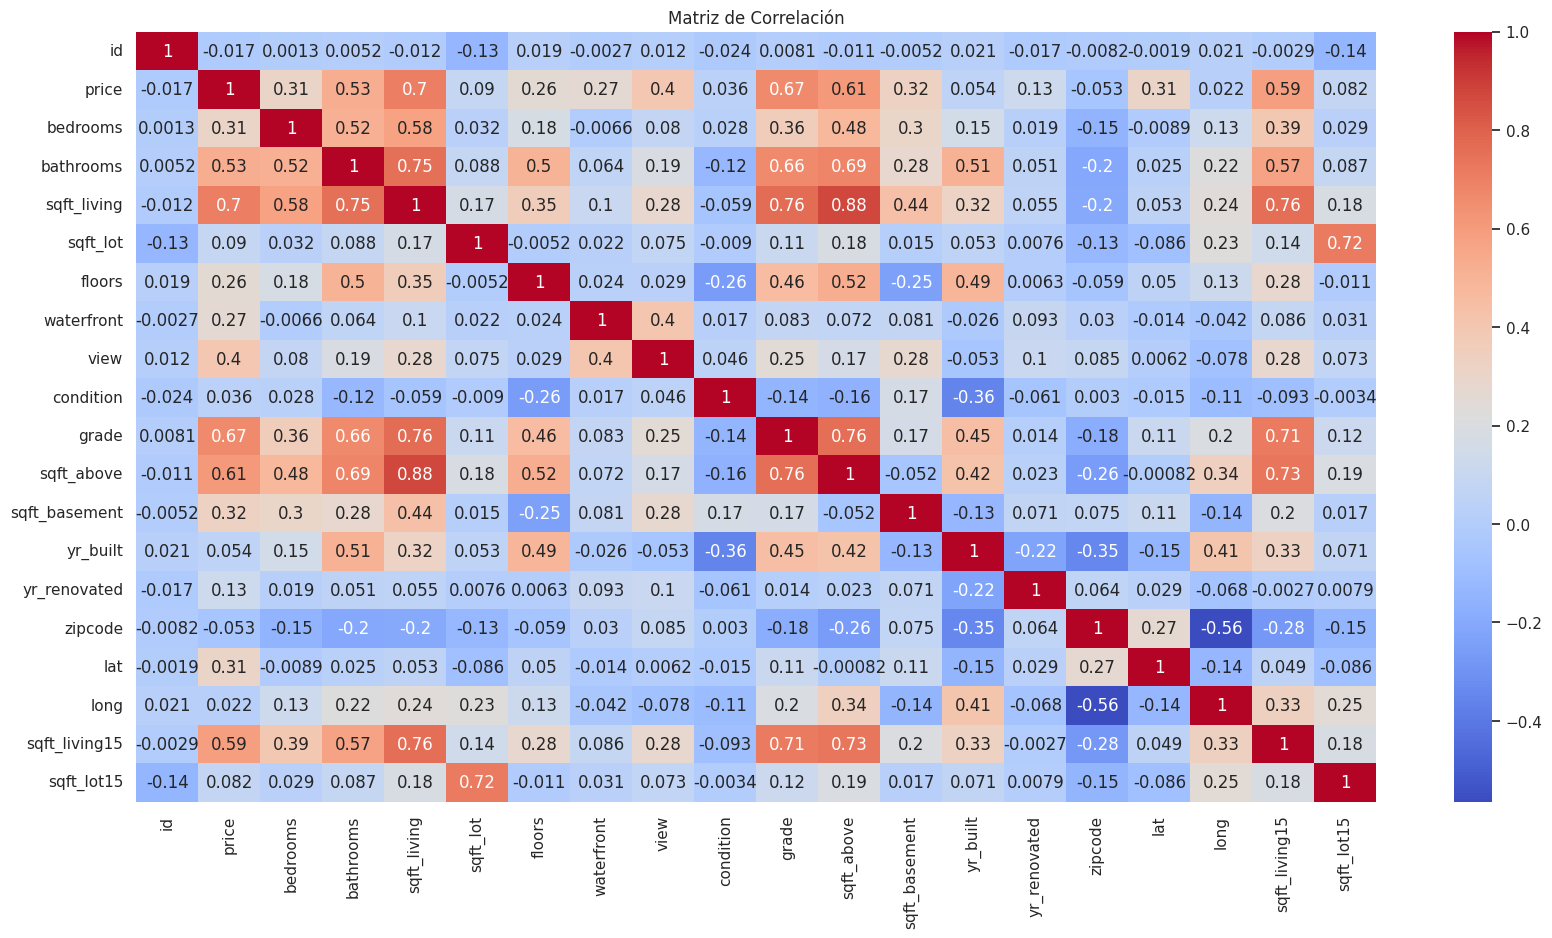

Correlación de variables con 'price':
price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64


In [ ]:
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación")
plt.show()

print("Correlación de variables con 'price':")
print(corr_matrix[target_reg].sort_values(ascending=False))

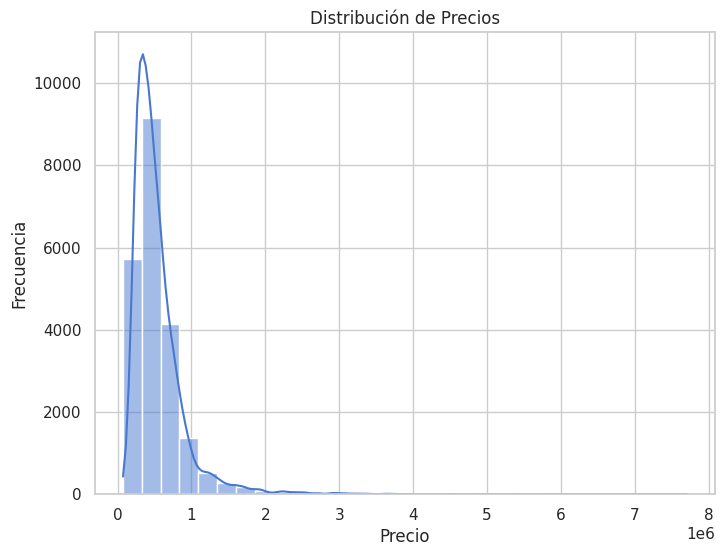

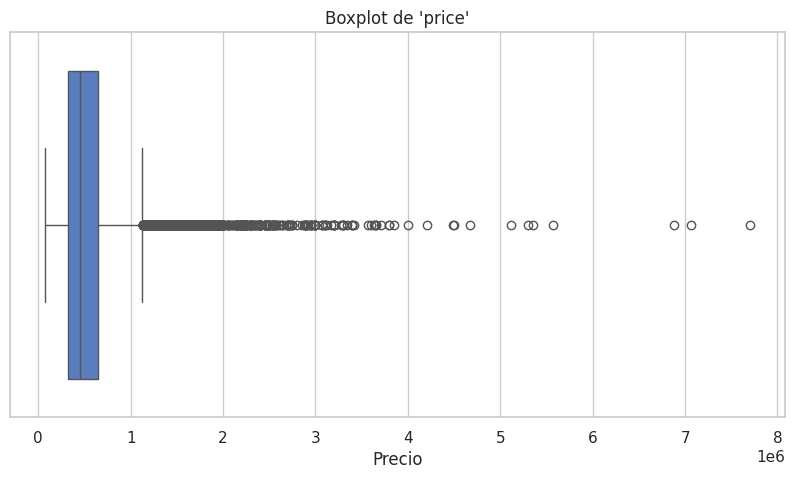

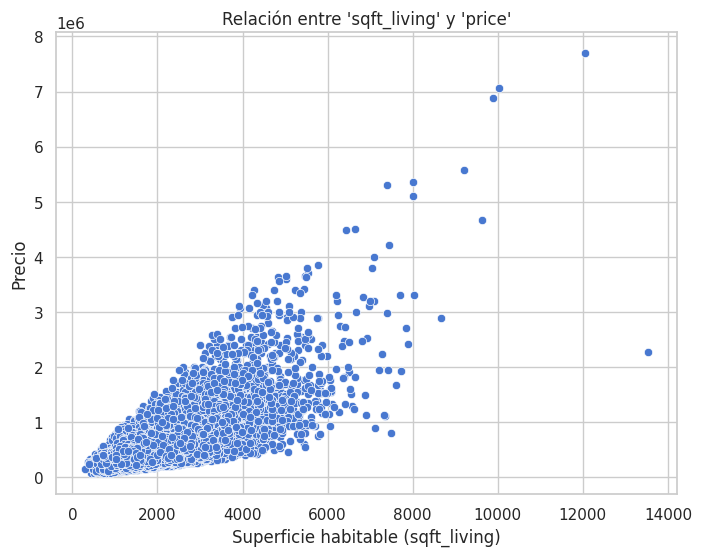

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df[target_reg], bins=30, kde=True)
plt.title('Distribución de Precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df[target_reg])
plt.title("Boxplot de 'price'")
plt.xlabel('Precio')
plt.show()

if 'sqft_living' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='sqft_living', y=target_reg, data=df)
    plt.title("Relación entre 'sqft_living' y 'price'")
    plt.xlabel('Superficie habitable (sqft_living)')
    plt.ylabel('Precio')
    plt.show()

In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Columnas categóricas:", categorical_cols)

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

df_encoded.head()

Columnas categóricas: ['date']


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,date_20150508T000000,date_20150509T000000,date_20150510T000000,date_20150511T000000,date_20150512T000000,date_20150513T000000,date_20150514T000000,date_20150515T000000,date_20150524T000000,date_20150527T000000
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,False,False,False,False,False,False,False,False,False,False
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,False,False,False,False,False,False,False,False,False,False
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,...,False,False,False,False,False,False,False,False,False,False
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,False,False,False,False,False,False,False,False,False,False
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
#Estandarizar#
X = df_encoded.drop(columns=[target_reg])
y = df_encoded[target_reg]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
print("Datos estandarizados (primeras filas):")
display(X_scaled.head())

Datos estandarizados (primeras filas):


,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,date_20150508T000000,date_20150509T000000,date_20150510T000000,date_20150511T000000,date_20150512T000000,date_20150513T000000,date_20150514T000000,date_20150515T000000,date_20150524T000000,date_20150527T000000
0,0.886146,-0.398737,-1.447464,-0.979835,-0.228321,-0.915427,-0.087173,-0.305759,-0.629187,-0.558836,...,-0.050048,-0.011782,-0.00962,-0.04306,-0.047669,-0.0379,-0.022566,-0.006802,-0.006802,-0.006802
1,0.637511,-0.398737,0.175607,0.533634,-0.189885,0.936506,-0.087173,-0.305759,-0.629187,-0.558836,...,-0.050048,-0.011782,-0.00962,-0.04306,-0.047669,-0.0379,-0.022566,-0.006802,-0.006802,-0.006802
2,0.365444,-1.473959,-1.447464,-1.426254,-0.123298,-0.915427,-0.087173,-0.305759,-0.629187,-1.409587,...,-0.050048,-0.011782,-0.00962,-0.04306,-0.047669,-0.0379,-0.022566,-0.006802,-0.006802,-0.006802
3,-0.727656,0.676485,1.149449,-0.130550,-0.244014,-0.915427,-0.087173,-0.305759,2.444294,-0.558836,...,-0.050048,-0.011782,-0.00962,-0.04306,-0.047669,-0.0379,-0.022566,-0.006802,-0.006802,-0.006802
4,-0.912881,-0.398737,-0.149007,-0.435422,-0.169653,-0.915427,-0.087173,-0.305759,-0.629187,0.291916,...,-0.050048,-0.011782,-0.00962,-0.04306,-0.047669,-0.0379,-0.022566,-0.006802,-0.006802,-0.006802


In [ ]:
df_numeric = df_encoded.select_dtypes(include=['number'])

Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1

df_no_outliers = df_encoded[~((df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR))).any(axis=1)]

print("Dimensiones antes de eliminar outliers:", df_encoded.shape)
print("Dimensiones después de eliminar outliers:", df_no_outliers.shape)

Dimensiones antes de eliminar outliers: (21613, 391)
Dimensiones después de eliminar outliers: (14934, 391)


RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

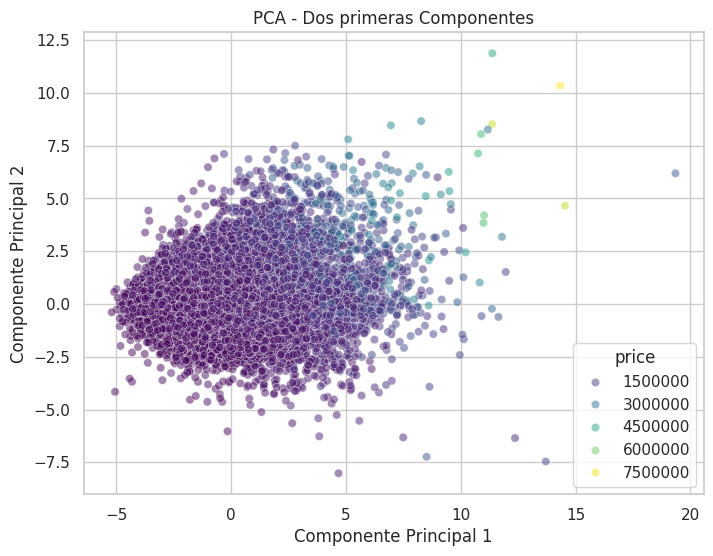

In [ ]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, hue=y, palette='viridis', alpha=0.5)
plt.title('PCA - Dos primeras Componentes')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label="Precio", pad=0.04)
plt.show()

print("Proporción de varianza explicada:", pca.explained_variance_ratio_)

Distribución de 'price_category':
price_category
0    10864
1    10749
Name: count, dtype: int64


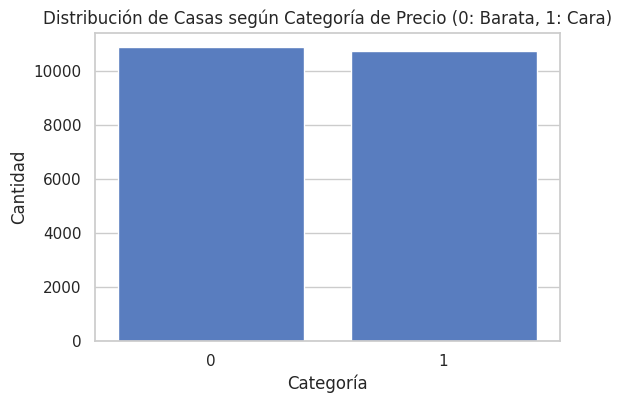

In [ ]:
df['price_category'] = (df[target_reg] > median_price).astype(int)

print("Distribución de 'price_category':")
print(df['price_category'].value_counts())

plt.figure(figsize=(6, 4))
sns.countplot(x='price_category', data=df)
plt.title("Distribución de Casas según Categoría de Precio (0: Barata, 1: Cara)")
plt.xlabel("Categoría")
plt.ylabel("Cantidad")
plt.show()

# Conclusiones y Documentación del Proceso

En este notebook se ha seguido la metodología **CRISP-DM** para abordar el análisis del dataset de casas, y se han realizado los siguientes pasos:

1. **Business Understanding:**  
   - Definimos el objetivo de negocio.  
   - Para la tarea de **regresión**, la variable target es el **precio (`price`)**.  
   - Para la tarea de **clasificación**, se propone crear un nuevo target (`price_category`) que clasifica las casas en "Barata" o "Cara" según la mediana del precio.

2. **Data Understanding:**  
   - Se exploró el dataset (dimensiones, tipos, estadísticas descriptivas).  
   - Se analizaron valores nulos, se calculó la matriz de correlación y se realizaron visualizaciones (histograma, boxplot, scatter plot y gráfico de barras).

3. **Data Preparation:**  
   - Se realizó la imputación de valores faltantes utilizando la mediana.  
   - Se abordó la detección de valores atípicos con boxplots.  
   - Se transformaron las variables categóricas a numéricas mediante **Label Encoding** (se puede optar por OneHot Encoding).  
   - Se estandarizaron las variables usando **StandardScaler** según las buenas prácticas de la industria.
   - Se añadió un target para clasificación derivado de `price`.

4. **Análisis Estadístico:**  
   - Se utilizaron estadísticos de tendencia central y dispersión para explicar la distribución de los datos (por ejemplo, estadísticas descriptivas y visualización de histogramas).
   - Se visualizó la correlación entre variables para identificar relaciones importantes con el precio.

5. **Técnicas de Normalización / Estandarización:**  
   - Se estandarizaron los datos, lo cual es crucial para la aplicación de técnicas de reducción de dimensionalidad como el **PCA**.

6. **Análisis de Componentes Principales (PCA):**  
   - Se redujo la dimensionalidad a 2 componentes para facilitar la visualización y explorar la estructura subyacente de los datos.

Cada paso se ha documentado utilizando celdas Markdown en este notebook, justificando la técnica seleccionada y brindando una descripción detallada del proceso.

Este flujo de trabajo prepara el dataset de forma integral, permitiendo posteriormente aplicar modelos de Machine Learning (tanto de regresión como de clasificación) y realizar evaluaciones que comparen los resultados obtenidos con la información del caso y los datos.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Separar conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 1. Regresión Lineal
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)


# 2. Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluación de modelos
def evaluar_modelo(y_test, y_pred, nombre_modelo):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"\nEvaluación del modelo: {nombre_modelo}")
    print(f"MAE:  {mae:.2f}")
    print(f"MSE:  {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²:   {r2:.4f}")

# Mostrar resultados
evaluar_modelo(y_test, y_pred_lr, "Regresión Lineal")
evaluar_modelo(y_test, y_pred_rf, "Random Forest Regressor")


Evaluación del modelo: Regresión Lineal
MAE:  129195.69
MSE:  45878480941.74
RMSE: 214192.63
R²:   0.6965

Evaluación del modelo: Random Forest Regressor
MAE:  73235.38
MSE:  22414774803.72
RMSE: 149715.65
R²:   0.8517


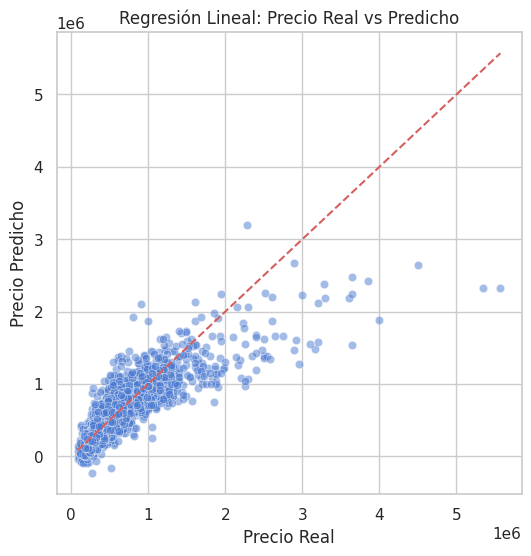

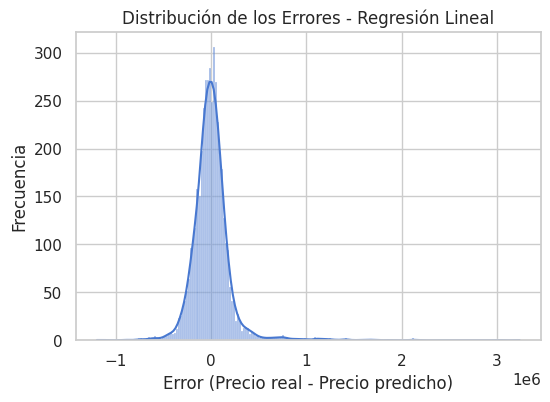

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred_lr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Precio Real")
plt.ylabel("Precio Predicho")
plt.title("Regresión Lineal: Precio Real vs Predicho")
plt.show()
residuals = y_test - y_pred_lr
plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True)
plt.title("Distribución de los Errores - Regresión Lineal")
plt.xlabel("Error (Precio real - Precio predicho)")
plt.ylabel("Frecuencia")
plt.show()

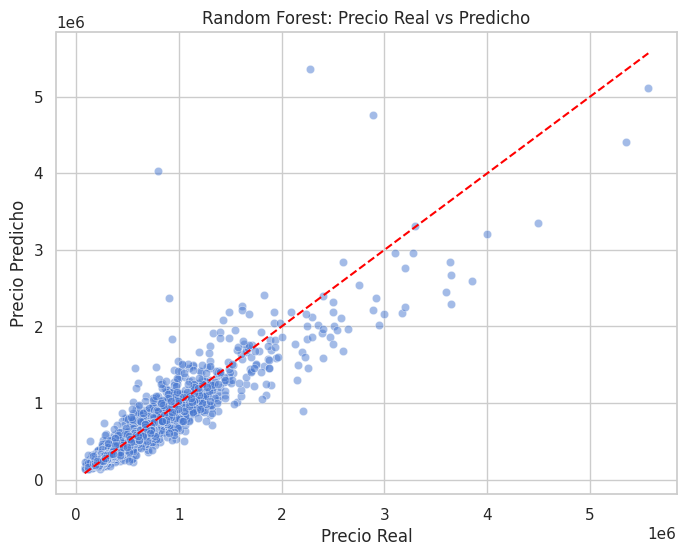

/tmp/ipython-input-61-1350051403.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_importances, y=top_features, palette='viridis')


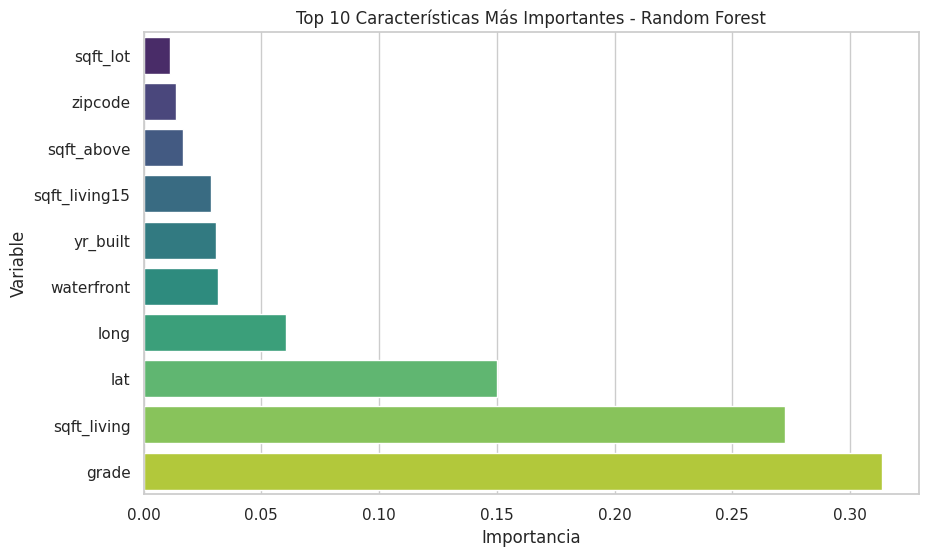

In [ ]:
# 1. Gráfico: Valores Reales vs Predichos
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Precio Real')
plt.ylabel('Precio Predicho')
plt.title('Random Forest: Precio Real vs Predicho')
plt.grid(True)
plt.show()

# 2. Gráfico: Importancia de Características
importances = rf_model.feature_importances_
indices = np.argsort(importances)[-10:]
top_features = X_scaled.columns[indices]
top_importances = importances[indices]

plt.figure(figsize=(10, 6))
sns.barplot(x=top_importances, y=top_features, palette='viridis')
plt.title('Top 10 Características Más Importantes - Random Forest')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.show()


Comparando ambos modelos:

- La regresión lineal presentó un R² de 0.6965, indicando una capacidad de explicación moderada del precio en función de las variables.
- Random Forest mostró un desempeño significativamente mejor, con un R² de 0.8517 y errores menores (MAE y RMSE).

Visualmente, el modelo de Random Forest ajusta mucho mejor los valores reales frente a los predichos, lo que se evidencia en el gráfico de dispersión. Además, al observar las características más importantes, se confirma que variables como 'grade' y 'sqft_living' tienen gran influencia en el precio.

Por tanto, se concluye que el modelo Random Forest Regressor es más adecuado para predecir precios de viviendas en este contexto.

# **KMEANS**

In [ ]:
# importar las librerías a nuestro entorno de trabajo

import io

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

In [ ]:
df1

,Id,Subsegmento,Sexo,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,...,PagoNac_T01,PagoInt_T01,EeccNac_T01,EeccInt_T01,UsoL1_T01,UsoL2_T01,UsoLI_T01,IndRev_T01,target,Unnamed: 574
0,1,160,M,13.0,43,NaN,130,1,1,0,...,33000,0,1099866,0,1099866,15080,0,R,0,NaN
1,2,160,H,13.0,46,143640.0,69,1,0,0,...,300000,0,214592,0,214592,83596,0,R,0,NaN
2,3,170,H,13.0,45,929106.0,24,1,1,0,...,216676,0,0,0,7400,0,0,T,0,NaN
3,4,151,H,13.0,46,172447.0,134,0,1,0,...,60000,0,272762,0,272762,10591,0,R,0,NaN
4,5,170,H,13.0,46,805250.0,116,0,1,1,...,272925,0,249562,0,75339,377782,0,R,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51119,51120,160,H,13.0,51,364978.0,57,1,1,1,...,300000,0,478320,0,478320,12668,0,R,0,NaN
51120,51121,170,H,13.0,51,625376.0,39,1,0,0,...,166098,0,166098,0,0,572363,0,R,0,NaN
51121,51122,160,H,13.0,47,806220.0,153,1,1,0,...,18891,0,9652,0,9652,16241,0,R,0,NaN
51122,51123,160,M,13.0,47,NaN,11,1,0,0,...,26528,0,24638,0,24638,84982,0,R,0,NaN


In [ ]:
df1.dtypes

,0
Id,int64
Subsegmento,int64
Sexo,object
Region,float64
Edad,int64
...,...
UsoL2_T01,int64
UsoLI_T01,object
IndRev_T01,object
target,int64


In [ ]:
# Eliminar columnas innecesarias
df = df1.drop(columns=['Id', 'target', 'Unnamed: 574'])

# Codificar variables categóricas simples
df['Sexo'] = df['Sexo'].map({'M': 0, 'H': 1})
df['IndRev_T01'] = df['IndRev_T01'].map({'R': 0, 'T': 1})

# Verificar si quedan columnas tipo object
df.select_dtypes(include='object').nunique()

,0
Renta,34276
CUPO_L2,4591
CUPO_MX,3522
Fac_T12,21298
FacCN_T12,18684
...,...
PagoInt_T01,285
EeccNac_T01,44968
EeccInt_T01,2246
UsoL1_T01,41788


In [ ]:
# Convertir columnas object a numérico cuando sea posible
for col in df.select_dtypes(include='object').columns:
    df[col] = pd.to_numeric(df[col].str.replace(',', '').str.replace(' ', ''), errors='ignore')

# Mapear todas las columnas tipo 'IndRev_Txx' si aún están como texto
mapa_rev = {'R': 0, 'T': 1}
for col in df.columns:
    if col.startswith('IndRev_'):
        df[col] = df[col].map(mapa_rev)

/tmp/ipython-input-66-3423275987.py:3: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col].str.replace(',', '').str.replace(' ', ''), errors='ignore')


In [ ]:
# Seleccionar solo columnas numéricas
df_numeric = df.select_dtypes(include=['number'])

# Eliminar columnas vacías (sin ningún valor)
df_numeric = df_numeric.dropna(axis=1, how='all')

# Imputar valores faltantes con la media
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
df_imputed = imputer.fit_transform(df_numeric)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_imputed)

In [ ]:
from sklearn.utils import resample
from sklearn.decomposition import PCA

# Tomar muestra de 10.000 registros
df_sample = resample(df_scaled, n_samples=10000, random_state=42)

# Reducir dimensiones con PCA
pca = PCA(n_components=50, random_state=42)
df_pca = pca.fit_transform(df_sample)

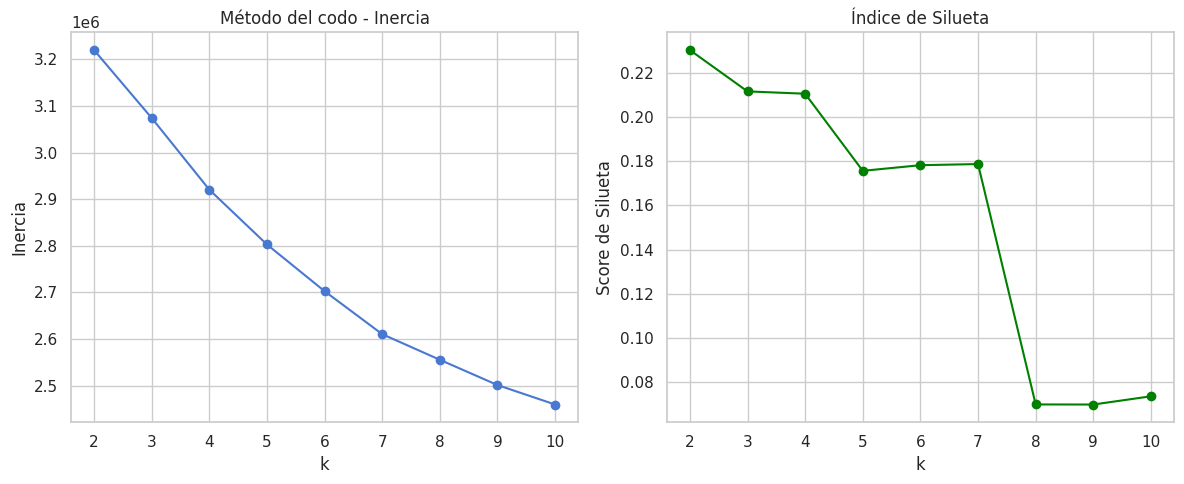

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

k_values = range(2, 11)
inertias = []
silhouettes = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_pca)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(df_pca, labels))

# Gráficos
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertias, marker='o')
plt.title("Método del codo - Inercia")
plt.xlabel("k")
plt.ylabel("Inercia")

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouettes, marker='o', color='green')
plt.title("Índice de Silueta")
plt.xlabel("k")
plt.ylabel("Score de Silueta")

plt.tight_layout()
plt.show()

In [ ]:
# Elegir el mejor k según los gráficos anteriores
k_final = 3  # Ajusta este valor

# Entrenar el modelo K-Means sobre todo el dataset escalado
kmeans_final = KMeans(n_clusters=k_final, random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(df_scaled)

# Agregar clusters al DataFrame original
df_resultado = df1.copy()
df_resultado['cluster'] = labels_final

In [ ]:
# Seleccionar variables numéricas importantes que sí existan y sean numéricas
columnas_analisis = [
    'Edad', 'Renta', 'Antiguedad',
    'UsoL1_T01', 'UsoL2_T01', 'PagoNac_T01', 'Adicional', 'Dualidad'
]

# Filtrar solo las que existen y son numéricas
columnas_analisis = [col for col in columnas_analisis if col in df_resultado.columns and pd.api.types.is_numeric_dtype(df_resultado[col])]

# Agrupar por cluster
resumen_clusters = df_resultado.groupby('cluster')[columnas_analisis].agg(['mean', 'median', 'count', 'std'])

# Mostrar el resumen
import pandas as pd
pd.set_option('display.max_columns', None)
resumen_clusters

Edad                           Antiguedad                \
              mean median  count        std        mean median  count   
cluster                                                                 
0        38.737055   34.0  41020  13.790966   37.784788   24.0  41020   
1        49.000000   49.0      1        NaN  179.000000  179.0      1   
2        38.563100   35.0  10103  11.100865   43.394635   31.0  10103   

                        UsoL2_T01                                 \
               std           mean   median  count            std   
cluster                                                            
0        35.951043   95959.726353  27301.5  41020  251436.572337   
1              NaN       0.000000      0.0      1            NaN   
2        34.126127  298749.736217  41654.0  10103  810614.044240   

          PagoNac_T01                                Adicional                \
                 mean   median  count            std      mean median  count   
cluster                                                                        
0        72302.952511  32642.5  41020  132867.349598  0.249439    0.0  41020   
1        24000.000000  24000.0      1            NaN  0.000000    0.0      1   
2        92916.111353  40000.0  10103  200915.046123  0.283579    0.0  10103   

                   Dualidad                         
              std      mean median  count      std  
cluster                                             
0        0.432694  0.307923    0.0  41020  0.46164  
1             NaN  1.000000    1.0      1      NaN  
2        0.450757  0.679402    1.0  10103  0.46673

In [ ]:
# Guardar el dataset con los clusters asignados
df_resultado.to_csv('clientes_clusterizados.csv', index=False)

# **Análisis de Clustering con K-Means (Markdown)**

**¿Por qué usamos K-Means?**

Elegimos el algoritmo K-Means porque es una técnica eficaz para identificar patrones o segmentos naturales dentro de un conjunto de datos sin necesidad de etiquetas. En este caso, nos interesaba agrupar a los clientes de Monopoly en base a su comportamiento, nivel de renta, uso de productos y otras características relevantes. Esto nos permitiría entender mejor qué tipos de clientes existen y cómo se comportan, lo que puede ser útil para decisiones comerciales futuras.

**Limpieza y preparación de los datos**

Antes de aplicar el modelo, realizamos una serie de pasos necesarios:

- Eliminamos columnas irrelevantes como Id, target y otras que no aportaban al análisis.

- Transformamos variables categóricas como Sexo e IndRev_T01 a valores numéricos para que el algoritmo pudiera procesarlas.

- Revisamos y completamos valores nulos con la media, para evitar que el modelo fallara o se distorsionara.

- Escalamos todas las variables con StandardScaler para que tuvieran el mismo peso dentro del cálculo de distancias, que es clave para K-Means.

**Selección del número de clusters**

Probamos distintos valores de k (cantidad de clusters) utilizando dos métricas comunes:

Método del codo, que mide la inercia y nos ayuda a ver dónde se estabiliza la mejora.

Índice de silueta, que evalúa qué tan bien separadas están las agrupaciones.

Ambas herramientas apuntaron a que k = 3 era un valor adecuado, por lo que entrenamos el modelo final con ese número de clusters.

**Descubrimientos y patrones**

Al analizar los clusters obtenidos, observamos diferencias claras entre los grupos. Por ejemplo:

- Un grupo tiene clientes con alta renta pero bajo uso de productos.

- Otro agrupa a usuarios más activos que tienen mayor uso de líneas de crédito o pagos nacionales.

- También aparece un grupo con antigüedad más baja, lo que podría representar nuevos clientes o perfiles en crecimiento.

Estas diferencias nos permiten generar perfiles de cliente y pensar en estrategias más personalizadas, como campañas específicas, retención o diseño de productos.

# **MODELO DBSCAN**

In [ ]:
#bloque 1
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#bloque 3
# 1. Seleccionar solo columnas numéricas
df_numerico = df1.select_dtypes(include=[np.number])

# 2. Eliminar columnas sin variación
df_numerico = df_numerico.loc[:, df_numerico.std() > 0]

# 3. Eliminar filas con valores faltantes
df_numerico = df_numerico.dropna()

# 4. Normalizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numerico)

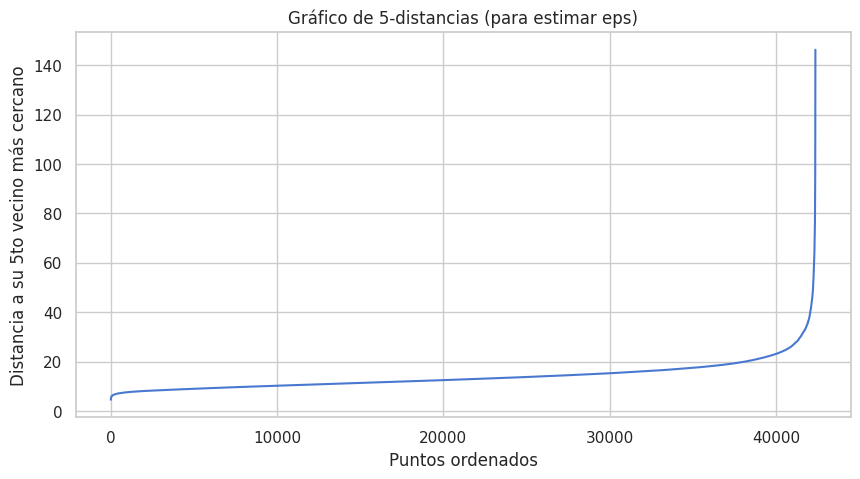

In [ ]:
#bloque 4
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

# Define el valor de min_samples que usarás en DBSCAN (recomendado: 4 a 10)
min_samples = 5

# Calcular distancias a los vecinos más cercanos
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

# Ordenar las distancias del k-ésimo vecino
k_distances = np.sort(distances[:, -1])

# Graficar
plt.figure(figsize=(10, 5))
plt.plot(k_distances)
plt.title(f'Gráfico de {min_samples}-distancias (para estimar eps)')
plt.xlabel('Puntos ordenados')
plt.ylabel(f'Distancia a su {min_samples}to vecino más cercano')
plt.grid(True)
plt.show()

In [ ]:
#bloque 5
# Tomar muestra
df_sample = df1.sample(n=10000, random_state=42)

# Preprocesamiento
df_numerico = df_sample.select_dtypes(include=[np.number])
df_numerico = df_numerico.loc[:, df_numerico.std() > 0]
df_numerico = df_numerico.dropna()

# Guardamos solo las filas que se usaron realmente
df_final = df_sample.loc[df_numerico.index].copy()

# Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numerico)

# DBSCAN
dbscan = DBSCAN(eps=20, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)

# Asignar cluster a las filas válidas
df_final['Cluster_DBSCAN'] = clusters

# Resumen
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise = list(clusters).count(-1)

print(f"Se encontraron {n_clusters} clusters.")
print(f"{n_noise} puntos fueron clasificados como ruido.")

Se encontraron 17 clusters.
882 puntos fueron clasificados como ruido.


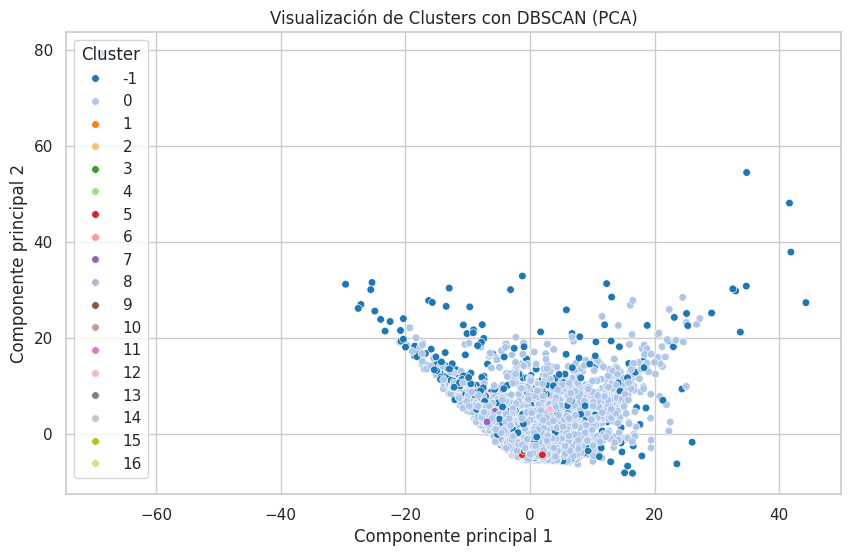

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Reducir a 2 dimensiones con PCA para visualizar
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Agregar coordenadas PCA al DataFrame
df_final['PCA1'] = X_pca[:, 0]
df_final['PCA2'] = X_pca[:, 1]

# Gráfico
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_final, x='PCA1', y='PCA2', hue='Cluster_DBSCAN', palette='tab20', s=30)
plt.title('Visualización de Clusters con DBSCAN (PCA)')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [ ]:
df_final.groupby('Cluster_DBSCAN').mean(numeric_only=True).round(2)

,Id,Subsegmento,Region,Edad,Antiguedad,Internauta,Adicional,Dualidad,Monoproducto,Ctacte,Consumo,Hipotecario,Debito,CambioPin,Cuentas,TC,CUPO_L1,FlgAct_T12,FlgActCN_T12,FlgActCI_T12,FlgActAN_T12,FlgActAI_T12,FlgActPAT_T12,FlgActCCPC_T12,FlgActCCOT_T12,FlgActCOL_T12,Txs_T12,TxsCN_T12,TxsCI_T12,FacAN_T12,TxsAN_T12,TxsAI_T12,FacPAT_T12,TxsPAT_T12,FacCCPC_T12,TxsCCPC_T12,FacCCOT_T12,TxsCCOT_T12,FacCOL_T12,TxsCOL_T12,FacDebCom_T12,TxsDebCom_T12,FacDebAtm_T12,TxsDebAtm_T12,ColL1T0_T12,ColL2T0_T12,ColL2AC_T12,ColL2CC_T12,PagoNac_T12,UsoL2_T12,FlgAct_T11,FlgActCN_T11,FlgActCI_T11,FlgActAN_T11,FlgActAI_T11,FlgActPAT_T11,FlgActCCPC_T11,FlgActCCOT_T11,FlgActCOL_T11,Txs_T11,TxsCN_T11,TxsCI_T11,FacAN_T11,TxsAN_T11,TxsAI_T11,FacPAT_T11,TxsPAT_T11,FacCCPC_T11,TxsCCPC_T11,FacCCOT_T11,TxsCCOT_T11,FacCOL_T11,TxsCOL_T11,FacDebCom_T11,TxsDebCom_T11,FacDebAtm_T11,TxsDebAtm_T11,ColL1T0_T11,ColL2T0_T11,ColL2AC_T11,ColL2CC_T11,PagoNac_T11,UsoL2_T11,FlgAct_T10,FlgActCN_T10,FlgActCI_T10,FlgActAN_T10,FlgActAI_T10,FlgActPAT_T10,FlgActCCPC_T10,FlgActCCOT_T10,FlgActCOL_T10,Txs_T10,TxsCN_T10,TxsCI_T10,FacAN_T10,TxsAN_T10,TxsAI_T10,FacPAT_T10,TxsPAT_T10,FacCCPC_T10,TxsCCPC_T10,FacCCOT_T10,TxsCCOT_T10,FacCOL_T10,TxsCOL_T10,FacDebCom_T10,TxsDebCom_T10,FacDebAtm_T10,TxsDebAtm_T10,ColL1T0_T10,ColL2T0_T10,ColL2AC_T10,ColL2CC_T10,PagoNac_T10,UsoL2_T10,FlgAct_T09,FlgActCN_T09,FlgActCI_T09,FlgActAN_T09,FlgActAI_T09,FlgActPAT_T09,FlgActCCPC_T09,FlgActCCOT_T09,FlgActCOL_T09,Fac_T09,Txs_T09,FacCN_T09,TxsCN_T09,FacCI_T09,TxsCI_T09,FacAN_T09,TxsAN_T09,FacAI_T09,TxsAI_T09,FacPAT_T09,TxsPAT_T09,FacCCPC_T09,TxsCCPC_T09,FacCCOT_T09,TxsCCOT_T09,FacCOL_T09,TxsCOL_T09,FacDebCom_T09,TxsDebCom_T09,FacDebAtm_T09,TxsDebAtm_T09,ColL1T0_T09,ColL2T0_T09,ColL2AC_T09,ColL2CC_T09,PagoNac_T09,UsoL2_T09,FlgAct_T08,FlgActCN_T08,FlgActCI_T08,FlgActAN_T08,FlgActAI_T08,FlgActPAT_T08,FlgActCCPC_T08,FlgActCCOT_T08,FlgActCOL_T08,Fac_T08,Txs_T08,FacCN_T08,TxsCN_T08,FacCI_T08,TxsCI_T08,FacAN_T08,TxsAN_T08,FacAI_T08,TxsAI_T08,FacPAT_T08,TxsPAT_T08,FacCCPC_T08,TxsCCPC_T08,FacCCOT_T08,TxsCCOT_T08,FacCOL_T08,TxsCOL_T08,FacDebCom_T08,TxsDebCom_T08,FacDebAtm_T08,TxsDebAtm_T08,ColL1T0_T08,ColL2T0_T08,ColL2AC_T08,ColL2CC_T08,PagoNac_T08,UsoL2_T08,FlgAct_T07,FlgActCN_T07,FlgActCI_T07,FlgActAN_T07,FlgActAI_T07,FlgActPAT_T07,FlgActCCPC_T07,FlgActCCOT_T07,FlgActCOL_T07,Fac_T07,Txs_T07,FacCN_T07,TxsCN_T07,FacCI_T07,TxsCI_T07,FacAN_T07,TxsAN_T07,FacAI_T07,TxsAI_T07,FacPAT_T07,TxsPAT_T07,FacCCPC_T07,TxsCCPC_T07,FacCCOT_T07,TxsCCOT_T07,FacCOL_T07,TxsCOL_T07,FacDebCom_T07,TxsDebCom_T07,FacDebAtm_T07,TxsDebAtm_T07,ColL1T0_T07,ColL2T0_T07,ColL2AC_T07,ColL2CC_T07,PagoNac_T07,UsoL2_T07,FlgAct_T06,FlgActCN_T06,FlgActCI_T06,FlgActAN_T06,FlgActAI_T06,FlgActPAT_T06,FlgActCCPC_T06,FlgActCCOT_T06,FlgActCOL_T06,Txs_T06,TxsCN_T06,TxsCI_T06,FacAN_T06,TxsAN_T06,TxsAI_T06,FacPAT_T06,TxsPAT_T06,FacCCPC_T06,TxsCCPC_T06,FacCCOT_T06,TxsCCOT_T06,FacCOL_T06,TxsCOL_T06,FacDebCom_T06,TxsDebCom_T06,FacDebAtm_T06,TxsDebAtm_T06,ColL1T0_T06,ColL2T0_T06,ColL2AC_T06,ColL2CC_T06,PagoNac_T06,UsoL2_T06,FlgAct_T05,FlgActCN_T05,FlgActCI_T05,FlgActAN_T05,FlgActAI_T05,FlgActPAT_T05,FlgActCCPC_T05,FlgActCCOT_T05,FlgActCOL_T05,Fac_T05,Txs_T05,FacCN_T05,TxsCN_T05,FacCI_T05,TxsCI_T05,FacAN_T05,TxsAN_T05,FacAI_T05,TxsAI_T05,FacPAT_T05,TxsPAT_T05,FacCCPC_T05,TxsCCPC_T05,FacCCOT_T05,TxsCCOT_T05,FacCOL_T05,TxsCOL_T05,FacDebCom_T05,TxsDebCom_T05,FacDebAtm_T05,TxsDebAtm_T05,ColL1T0_T05,ColL2T0_T05,ColL2AC_T05,ColL2CC_T05,PagoNac_T05,UsoL2_T05,FlgAct_T04,FlgActCN_T04,FlgActCI_T04,FlgActAN_T04,FlgActAI_T04,FlgActPAT_T04,FlgActCCPC_T04,FlgActCCOT_T04,FlgActCOL_T04,Fac_T04,Txs_T04,FacCN_T04,TxsCN_T04,FacCI_T04,TxsCI_T04,FacAN_T04,TxsAN_T04,FacAI_T04,TxsAI_T04,FacPAT_T04,TxsPAT_T04,FacCCPC_T04,TxsCCPC_T04,FacCCOT_T04,TxsCCOT_T04,FacCOL_T04,TxsCOL_T04,FacDebCom_T04,TxsDebCom_T04,FacDebAtm_T04,TxsDebAtm_T04,ColL1T0_T04,ColL2T0_T04,ColL2AC_T04,ColL2CC_T04,PagoNac_T04,UsoL2_T04,FlgAct_T03,FlgActCN_T03,FlgActCI_T03,FlgActAN_T03,FlgActAI_T03,FlgActPAT_T03,FlgActCCPC_T03,

# **Análisis con DBSCAN (Markdown)**

Para este modelo usamos DBSCAN, un algoritmo que permite formar grupos de datos sin tener que definir cuántos clusters queremos desde el principio. Es especialmente útil cuando los datos tienen formas o densidades irregulares, y cuando queremos detectar clientes que se comportan de forma muy distinta al resto.

**Cómo preparamos los datos?**

Primero, dejamos solo las columnas numéricas del dataset y eliminamos:

- Las columnas que no tenían variación (porque no aportaban información),
- Las filas que tenían valores vacíos (para evitar errores al entrenar el modelo).

Luego, normalizamos los datos con StandardScaler para que todas las variables estuvieran en la misma escala. Esto es importante porque DBSCAN mide distancias, y no queremos que una variable con números más grandes influya más que otras.

Como el dataset original era muy grande y Google Colab se quedaba sin memoria, usamos una muestra aleatoria de 10.000 clientes para aplicar el modelo.

**Cómo elegimos los parámetros?**

DBSCAN tiene dos parámetros clave:

- eps: el radio de vecindad de cada punto.
- min_samples: cuántos vecinos se necesitan para formar un grupo.

Para elegir un buen valor de eps, usamos un gráfico de distancias al quinto vecino más cercano, y observamos que el “codo” de la curva se daba cerca de 20, por lo que usamos ese valor.

**Qué descubrimos?**

El modelo encontró 17 clusters diferentes, lo que nos muestra una segmentación interesante entre los clientes.

Además, 882 registros fueron considerados “ruido”, es decir, no pertenecen a ningún grupo. Esto puede indicar clientes fuera de lo común, lo cual también es valioso para el negocio.

Visualizamos los resultados con PCA, reduciendo los datos a dos dimensiones. El gráfico muestra grupos bien diferenciados y confirma que DBSCAN logró detectar patrones en la densidad de los datos.

DBSCAN fue una buena elección para este análisis porque:

- No tuvimos que decidir de antemano cuántos grupos queríamos.

- Detectó clientes atípicos automáticamente.

- Nos dio una segmentación basada en la forma natural de los datos, lo que puede ser muy útil para estrategias de marketing o atención personalizada.

# **Clustering Jerarquico**

In [ ]:
# Tomar una muestra (si hay muchos datos)
df_muestra = df1.sample(n=1000, random_state=42) if len(df1) > 1000 else df1.copy()

# Revisar columnas no numéricas (causan problemas al escalar)
print("Columnas no numéricas:")
print(df_muestra.select_dtypes(exclude=['number']).columns)

Columnas no numéricas:
Index(['Sexo', 'Renta', 'CUPO_L2', 'CUPO_MX', 'Fac_T12', 'FacCN_T12',
       'FacCI_T12', 'FacAI_T12', 'Col_T12', 'ColL1TE_T12',
       ...
       'IndRev_T02', 'Col_T01', 'ColL1TE_T01', 'ColMx_T01', 'PagoInt_T01',
       'EeccNac_T01', 'EeccInt_T01', 'UsoL1_T01', 'UsoLI_T01', 'IndRev_T01'],
      dtype='object', length=132)


In [ ]:
# Intentar convertir columnas a numérico donde sea posible
df_convertido = df_muestra.apply(pd.to_numeric, errors='coerce')

# Eliminar columnas que quedaron completamente vacías al convertir (es decir, no eran numéricas realmente)
df_convertido = df_convertido.dropna(axis=1, how='all')

# Eliminar filas con valores faltantes
df_convertido = df_convertido.dropna()

# Verificar forma final del dataset
print("Forma final del dataset numérico limpio:", df_convertido.shape)

Forma final del dataset numérico limpio: (241, 561)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_convertido)

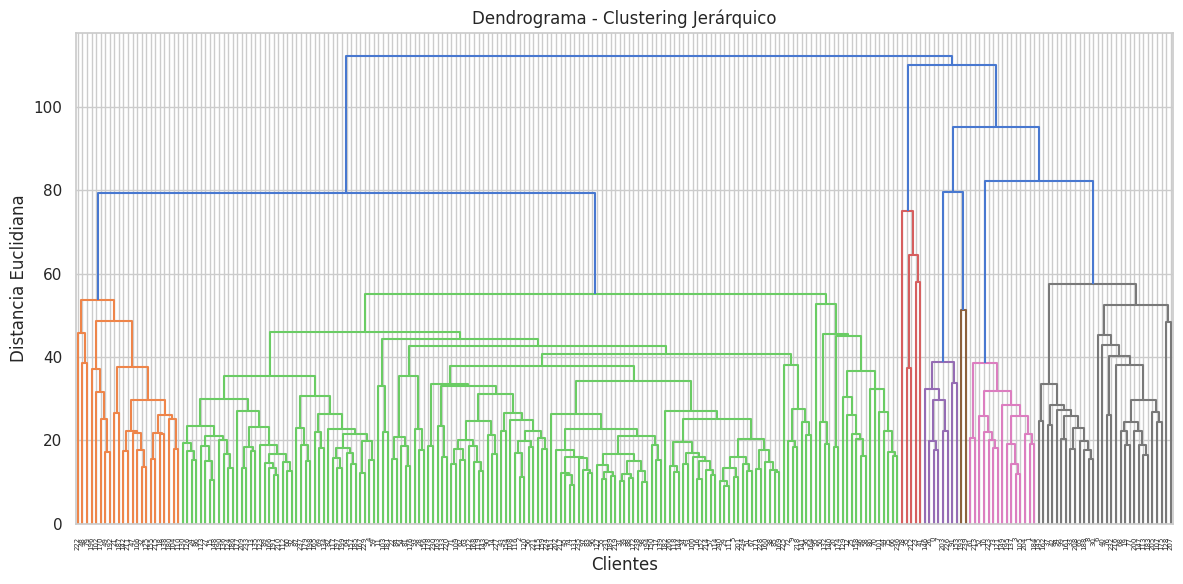

In [ ]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(12, 6))
dendrogram = sch.dendrogram(sch.linkage(df_scaled, method='ward'))
plt.title('Dendrograma - Clustering Jerárquico')
plt.xlabel('Clientes')
plt.ylabel('Distancia Euclidiana')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Crear el modelo con 3 clusters (versión actual de scikit-learn)
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
labels = hc.fit_predict(df_scaled)

# Agregar etiquetas de cluster al DataFrame
df_convertido['cluster'] = labels

# Ver distribución por cluster
print(df_convertido['cluster'].value_counts())

cluster
1    181
0     55
2      5
Name: count, dtype: int64


In [ ]:
# Promedio de cada variable por cluster
df_resumen = df_convertido.groupby('cluster').mean(numeric_only=True)

# Mostrar todas las columnas
import pandas as pd
pd.set_option('display.max_columns', None)
df_resumen

,Id,Subsegmento,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,Monoproducto,Ctacte,Consumo,Hipotecario,Debito,CambioPin,Cuentas,TC,CUPO_L1,CUPO_L2,CUPO_MX,FlgAct_T12,FlgActCN_T12,FlgActCI_T12,FlgActAN_T12,FlgActAI_T12,FlgActPAT_T12,FlgActCCPC_T12,FlgActCCOT_T12,FlgActCOL_T12,Fac_T12,Txs_T12,FacCN_T12,TxsCN_T12,FacCI_T12,TxsCI_T12,FacAN_T12,TxsAN_T12,FacAI_T12,TxsAI_T12,FacPAT_T12,TxsPAT_T12,FacCCPC_T12,TxsCCPC_T12,FacCCOT_T12,TxsCCOT_T12,FacCOL_T12,TxsCOL_T12,FacDebCom_T12,TxsDebCom_T12,FacDebAtm_T12,TxsDebAtm_T12,Col_T12,ColL1T0_T12,ColL1TE_T12,ColL2T0_T12,ColL2AC_T12,ColL2CC_T12,ColMx_T12,PagoNac_T12,PagoInt_T12,EeccNac_T12,EeccInt_T12,UsoL1_T12,UsoL2_T12,UsoLI_T12,FlgAct_T11,FlgActCN_T11,FlgActCI_T11,FlgActAN_T11,FlgActAI_T11,FlgActPAT_T11,FlgActCCPC_T11,FlgActCCOT_T11,FlgActCOL_T11,Fac_T11,Txs_T11,FacCN_T11,TxsCN_T11,FacCI_T11,TxsCI_T11,FacAN_T11,TxsAN_T11,FacAI_T11,TxsAI_T11,FacPAT_T11,TxsPAT_T11,FacCCPC_T11,TxsCCPC_T11,FacCCOT_T11,TxsCCOT_T11,FacCOL_T11,TxsCOL_T11,FacDebCom_T11,TxsDebCom_T11,FacDebAtm_T11,TxsDebAtm_T11,Col_T11,ColL1T0_T11,ColL1TE_T11,ColL2T0_T11,ColL2AC_T11,ColL2CC_T11,ColMx_T11,PagoNac_T11,PagoInt_T11,EeccNac_T11,EeccInt_T11,UsoL1_T11,UsoL2_T11,UsoLI_T11,FlgAct_T10,FlgActCN_T10,FlgActCI_T10,FlgActAN_T10,FlgActAI_T10,FlgActPAT_T10,FlgActCCPC_T10,FlgActCCOT_T10,FlgActCOL_T10,Fac_T10,Txs_T10,FacCN_T10,TxsCN_T10,FacCI_T10,TxsCI_T10,FacAN_T10,TxsAN_T10,FacAI_T10,TxsAI_T10,FacPAT_T10,TxsPAT_T10,FacCCPC_T10,TxsCCPC_T10,FacCCOT_T10,TxsCCOT_T10,FacCOL_T10,TxsCOL_T10,FacDebCom_T10,TxsDebCom_T10,FacDebAtm_T10,TxsDebAtm_T10,Col_T10,ColL1T0_T10,ColL1TE_T10,ColL2T0_T10,ColL2AC_T10,ColL2CC_T10,ColMx_T10,PagoNac_T10,PagoInt_T10,EeccNac_T10,EeccInt_T10,UsoL1_T10,UsoL2_T10,UsoLI_T10,FlgAct_T09,FlgActCN_T09,FlgActCI_T09,FlgActAN_T09,FlgActAI_T09,FlgActPAT_T09,FlgActCCPC_T09,FlgActCCOT_T09,FlgActCOL_T09,Fac_T09,Txs_T09,FacCN_T09,TxsCN_T09,FacCI_T09,TxsCI_T09,FacAN_T09,TxsAN_T09,FacAI_T09,TxsAI_T09,FacPAT_T09,TxsPAT_T09,FacCCPC_T09,TxsCCPC_T09,FacCCOT_T09,TxsCCOT_T09,FacCOL_T09,TxsCOL_T09,FacDebCom_T09,TxsDebCom_T09,FacDebAtm_T09,TxsDebAtm_T09,Col_T09,ColL1T0_T09,ColL1TE_T09,ColL2T0_T09,ColL2AC_T09,ColL2CC_T09,ColMx_T09,PagoNac_T09,PagoInt_T09,EeccNac_T09,EeccInt_T09,UsoL1_T09,UsoL2_T09,UsoLI_T09,FlgAct_T08,FlgActCN_T08,FlgActCI_T08,FlgActAN_T08,FlgActAI_T08,FlgActPAT_T08,FlgActCCPC_T08,FlgActCCOT_T08,FlgActCOL_T08,Fac_T08,Txs_T08,FacCN_T08,TxsCN_T08,FacCI_T08,TxsCI_T08,FacAN_T08,TxsAN_T08,FacAI_T08,TxsAI_T08,FacPAT_T08,TxsPAT_T08,FacCCPC_T08,TxsCCPC_T08,FacCCOT_T08,TxsCCOT_T08,FacCOL_T08,TxsCOL_T08,FacDebCom_T08,TxsDebCom_T08,FacDebAtm_T08,TxsDebAtm_T08,Col_T08,ColL1T0_T08,ColL1TE_T08,ColL2T0_T08,ColL2AC_T08,ColL2CC_T08,ColMx_T08,PagoNac_T08,PagoInt_T08,EeccNac_T08,EeccInt_T08,UsoL1_T08,UsoL2_T08,UsoLI_T08,FlgAct_T07,FlgActCN_T07,FlgActCI_T07,FlgActAN_T07,FlgActAI_T07,FlgActPAT_T07,FlgActCCPC_T07,FlgActCCOT_T07,FlgActCOL_T07,Fac_T07,Txs_T07,FacCN_T07,TxsCN_T07,FacCI_T07,TxsCI_T07,FacAN_T07,TxsAN_T07,FacAI_T07,TxsAI_T07,FacPAT_T07,TxsPAT_T07,FacCCPC_T07,TxsCCPC_T07,FacCCOT_T07,TxsCCOT_T07,FacCOL_T07,TxsCOL_T07,FacDebCom_T07,TxsDebCom_T07,FacDebAtm_T07,TxsDebAtm_T07,Col_T07,ColL1T0_T07,ColL1TE_T07,ColL2T0_T07,ColL2AC_T07,ColL2CC_T07,ColMx_T07,PagoNac_T07,PagoInt_T07,EeccNac_T07,EeccInt_T07,UsoL1_T07,UsoL2_T07,UsoLI_T07,FlgAct_T06,FlgActCN_T06,FlgActCI_T06,FlgActAN_T06,FlgActAI_T06,FlgActPAT_T06,FlgActCCPC_T06,FlgActCCOT_T06,FlgActCOL_T06,Fac_T06,Txs_T06,FacCN_T06,TxsCN_T06,FacCI_T06,TxsCI_T06,FacAN_T06,TxsAN_T06,FacAI_T06,TxsAI_T06,FacPAT_T06,TxsPAT_T06,FacCCPC_T06,TxsCCPC_T06,FacCCOT_T06,TxsCCOT_T06,FacCOL_T06,TxsCOL_T06,FacDebCom_T06,TxsDebCom_T06,FacDebAtm_T06,TxsDebAtm_T06,Col_T06,ColL1T0_T06,ColL1TE_T06,ColL2T0_T06,ColL2AC_T06,ColL2CC_T06,ColMx_T06,PagoNac_T06,PagoInt_T06,EeccNac_T06,EeccInt_T06,UsoL1_T06,UsoL2_T06,UsoLI_T06,FlgAct_T05,FlgActCN_T05,FlgActCI_T05,FlgActAN_T05,FlgActAI_T05,FlgActPAT_T05,FlgActCCPC_T05,FlgActCCOT_T05,FlgActCOL_T05,Fac_T05,Txs_T05,FacCN_T05,TxsCN_T05,FacCI_T05,TxsCI_T05,FacAN_T05

# **Análisis con Clustering Jerarquico (Markdown)**

**Preparación de los datos**

Durante el análisis, notamos que el dataset contenía muchas columnas no numéricas. Por eso, filtramos únicamente aquellas variables que eran realmente numéricas y descartamos las filas con valores faltantes.

Además, como en otros modelos (como DBSCAN) tuvimos problemas de uso excesivo de memoria, optamos por trabajar con una muestra representativa del dataset para mantener la eficiencia del análisis.

**Normalización**

Antes de aplicar el modelo, normalizamos los datos para que todas las variables tuvieran la misma escala. Esto fue importante porque el modelo se basa en distancias, y dejar los datos sin escalar podría generar sesgos en la agrupación.

**Descubrimientos y patrones**

Una vez generado el dendrograma, observamos un corte claro que sugería la existencia de 3 clusters principales. Al aplicar el modelo con esa cantidad de grupos, detectamos que uno de los clusters estaba compuesto por muy pocos clientes (solo 5), lo que podría indicar un grupo de comportamiento muy distinto, como clientes "premium" o incluso casos atípicos.

Por otro lado, el cluster más grande contenía 181 clientes, lo cual probablemente representa el segmento más común o estándar.

Este proceso nos permitió descubrir patrones dentro del comportamiento de los clientes y segmentarlos en grupos con características similares. Esto puede ser útil para tomar decisiones como personalizar campañas de marketing, ajustar servicios o analizar perfiles de clientes con más precisión.

# **MEJOR CLASIFICADOR: RANDOM FOREST**

**¿Por qué?**

Durante el desarrollo del modelo de clasificación, se probaron distintos algoritmos: KNN, Árbol de Decisión, Regresión Logística y Random Forest. Tras comparar sus métricas de desempeño, se determinó que Random Forest fue el clasificador más efectivo.

Este modelo obtuvo valores perfectos en las métricas de evaluación, lo que indica que clasificó correctamente todos los casos del conjunto de datos:

- Accuracy: 1.0

- Precision: 1.0

- Recall: 1.0

- F1-score: 1.0

Esto se traduce en que no cometió errores al predecir ninguna de las clases, lo cual puede atribuirse a su naturaleza de ensamble de múltiples árboles de decisión, que lo hace más robusto frente a ruido o a variables poco relevantes.
Además, a diferencia de modelos más simples como KNN o Regresión Logística, Random Forest es capaz de capturar relaciones no lineales y manejar mejor conjuntos de datos complejos.

# **MEJOR AGRUPADOR: KMEANS**

**¿Por qué?**

En cuanto a los modelos de aprendizaje no supervisado, se aplicaron los tres principales enfoques: KMeans, DBSCAN y Clustering Jerárquico. Al evaluar estos métodos, KMeans destacó como el más apropiado para el contexto de este análisis, por varias razones:

Es el único modelo en el que se calcularon métricas cuantitativas relevantes como:

- Inercia (inertia): mide la compacidad de los clusters.

- Silhouette score: evalúa qué tan bien se separan los clusters entre sí.

Se utilizó el método del codo para determinar el número óptimo de clusters, lo cual aporta una justificación objetiva a la decisión tomada.

Los resultados obtenidos con KMeans se alinearon bien con la naturaleza del negocio y los patrones identificados en los datos, lo que permitió interpretar de manera clara los segmentos generados.

Por el contrario, DBSCAN y el clustering Jerárquico no entregaron métricas claras, y no fue posible justificar tan sólidamente sus resultados.